In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install plotly
# !pip install streamlit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

## Data Cleaning and Preprocessing

This is a clean dataset, so nothing to do here, but it's always good to check for missing values.

In [8]:
# Drop unnecessary columns
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check for any remaining missing values
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis

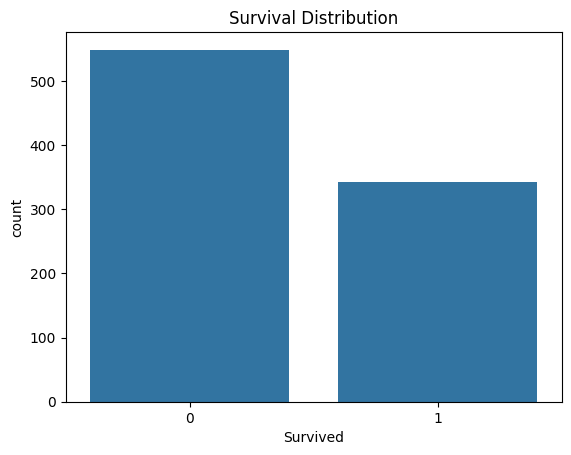

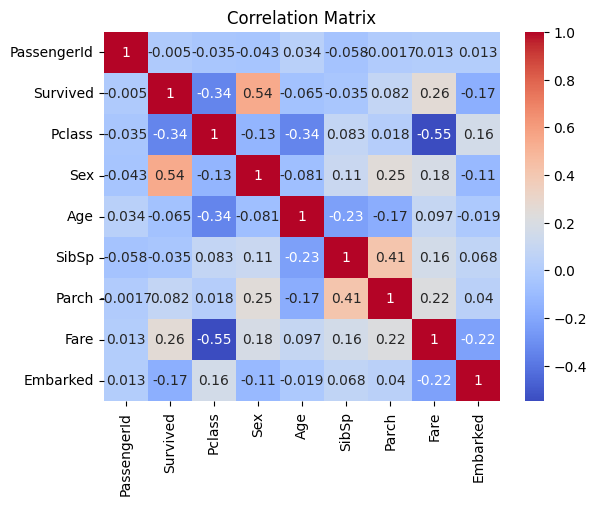

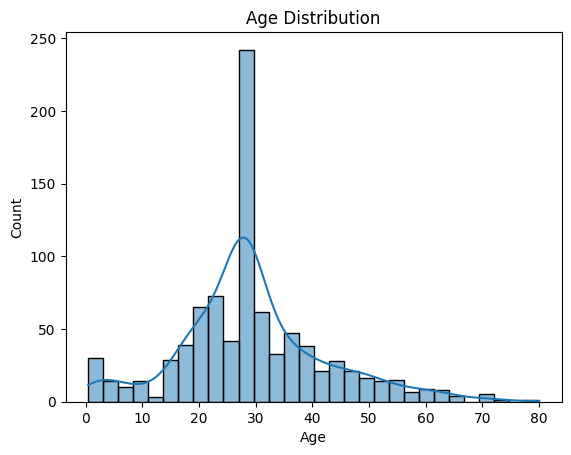

In [9]:
# Check survival distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Explore correlations
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


From the visualizations above, we can extract more information about the dataset. We can see in the correlation heatmap that the most correlated features with the target variable are `Fare` and `Pclass`.
Those with the most negative correlation are `Sex` and `Survived`.

## Feature Engineering and Selection

In [10]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']


## Model Building and Evaluation

In [11]:
# Use a simple model like Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Data Visualization and Dashboard Creation

In [12]:
# !pip install ipykernel
!pip install --upgrade nbformat

In [13]:
# Create interactive visualizations with Plotly Express
fig = px.scatter(df, x='Age', y='Fare', color='Survived', size='FamilySize', facet_col='Pclass',
                 labels={'Survived': 'Survival', 'Pclass': 'Passenger Class'}, title='Survival Analysis')
fig.show()

# Create a simple Streamlit app
import streamlit as st

st.title('Titanic Survival Analysis')
st.sidebar.header('User Input Features')

# Collect user input for prediction
def user_input_features():
    sex = st.sidebar.selectbox('Sex', ('male', 'female'))
    pclass = st.sidebar.slider('Passenger Class', 1, 3, 2)
    age = st.sidebar.slider('Age', 0, 100, 30)
    family_size = st.sidebar.slider('Family Size', 1, 10, 5)
    fare = st.sidebar.slider('Fare', 0, 600, 30)
    embarked = st.sidebar.selectbox('Embarked', ('C', 'Q', 'S'))

    data = {'Sex': sex, 'Pclass': pclass, 'Age': age, 'FamilySize': family_size, 'Fare': fare, 'Embarked': embarked}
    features = pd.DataFrame(data, index=[0])
    return features

user_input = user_input_features()

# Make predictions
prediction = model.predict(user_input)

# Display prediction
st.subheader('Prediction')
st.write('Survived' if prediction[0] == 1 else 'Not Survived')


2023-12-01 16:58:03.964 
  command:

    streamlit run e:\Development\data-analysis\titanic\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
